In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets", filter="data")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing_full = load_housing_data()

In [2]:
housing_full.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing_full["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [5]:
housing_full.describe()#shows a summary of the numerical attributes
#count,mean,min,max satırları kendinden açıklayıcıdır
#null değerler dikkate alınmaz
#std satırı değerlerin ne kadar dağıldığını ölçer
# %25,50,75 satırları ilgili yüzdelikleri gösterir.1 yüzdelik bir gözlem grubundaki belirli bir yüzde oranındaki gözlemlerin altında kalan değeri belirtir
#örn; districtlerin yüzde 25'inde housing_median_age 18'den düşüktür,
#yüzde 50'sinde 29'dan düşük, yüzde 75'inde 37'den düşüktür.
#Bunlar 25.yüzdelik(1.çeyrek) medyan ve 75.yüzdelik(3. çeyrek) olarak adlandırılır

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Histogram

* Histogram,belirli bir değer aralığına(yatay eksende) sahip örneklerin sayısını(dikey eksende) gösterir.
* Tüm veri kümesi üzerinde hist() metodunu çağırarak her sayısal öznitelik için bir histogram oluşturabiliriz

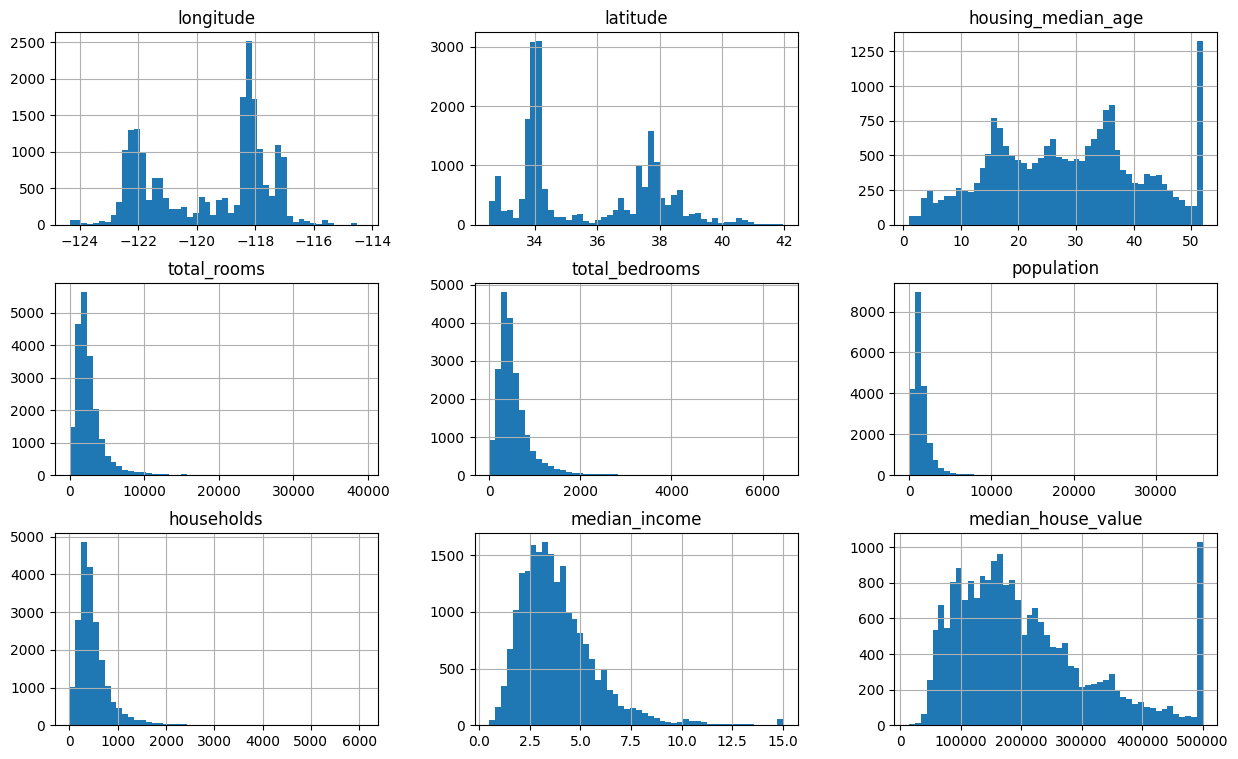

In [6]:
import matplotlib.pyplot as plt
housing_full.hist(figsize=(15,9),bins=50)
plt.show()

In [7]:
# median_income özniteliği USD cinsinden ifade edilmiş gibi değil
# veri ölçeklendirilmiş(3 yaklaşık=30.000 dolar)
# Ml de önceden işlenmiş(preprocseed) özniteliklerle çalışmak yaygındır
#Verinin nasıl hesaplandığını anlaman lazım

In [8]:
# housing_median_age ve median_house_value değerleri sınırlandırılmış
#median_house_age hedef değerimiz.Ml algoritmaları fiyatların asla bu sınırı aşmadığını öğrenebilir
#eğer ekibiniz 500k doların üzerindeki değerler için de kesin tahminlere ihtiyaç duyduklarını söylerlerse

# Etiketleri sınırlandırılmış bölgeler için gerçek değerleri topla
# Bu bölgeleri eğitim setinden çıkar

In [9]:
# birçok hist sağa çarpık. medyanın sağ tarafına sol tarafına göre daha çok uzanırlar
# bu durum bazı ml algoritmalarında desenleri(örüntüleri) tespit etmesini zorlaştıraibilir.

## Create a Test Set

* Verilere daha fazla bakmadan önce test seti oluşturup, bir kenara koymanız ve asla bakmamanız gerekir.
* Bunu yapma sebebi insan beyni olağanüstü bir örüntü tanıma sistemidir. bu da onun overfitting'e oldukça yatkın olduğu anlamına gelir.
* Eğer test setine bakarsak, test verisinde görünüşte ilginç bir örüntü fark edip belirli bir ML modeli seçmeye yönebiliriz.
* Test setini kullanarak genelleme hatasını(generalization error) tahmin ettiğimizde bu tahmin fazla iyimser olur ve beklenenden kötü performans gösteren bir sistem ortaya çıkar
* Bu duruma veri gözleme yanlılığı(data snooping bias) denir
* test seri oluşturmak için veri kümesinin %20'sini seçip bir kenara ayırmak yeterli(rastgele)

In [10]:
import numpy as np
def shuffle_and_split_data(data,test_ratio,rng):
    shuffled_indices=rng.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
#use function
rng=np.random.default_rng()#default random generator
train_test,test_set=shuffle_and_split_data(housing_full,0.2,rng)

print(f"Train set boyutu: {len(train_test)}")
print(f"Test set boyutu: {len(test_set)}")


Train set boyutu: 16512
Test set boyutu: 4128


### train-test-split

* Sklearn veri kümelerini farklı şekillerde birden fazla alt kümeye ayırmak için birkaç fonksyion sağlar. En basiti train_test_split() fonksiyonudur ve bu fonksyion,shuffle_and_split_data() fonksiyonu ile hemen hemen aynı işi yapar(birkaç ek özelliğe sahip)
* rastgele sayı üretici seedi ayarlamamızı sağlayan random_state adında bir parametresi vardır
* aynı sayıda satıra sahip birden fazla veri kümesini bu fonksiyona verebilir ve onları aynı indexler üzerinden böleriz

In [12]:
from sklearn.model_selection import train_test_split
train_test,test_set=train_test_split(housing_full,test_size=0.2,random_state=42)
print(f"Train set boyutu: {len(train_test)}")
print(f"Test set boyutu: {len(test_set)}")

Train set boyutu: 16512
Test set boyutu: 4128


In [13]:
housing_full.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


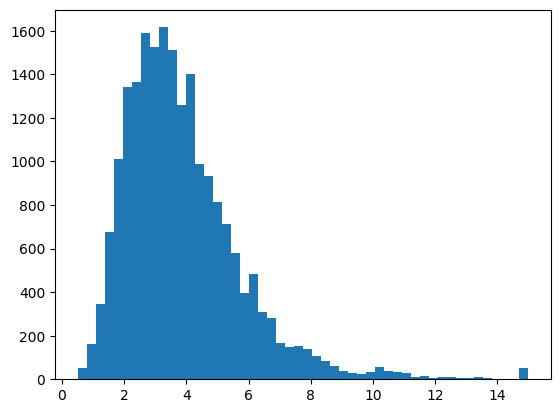

In [14]:
plt.hist(housing_full["median_income"],bins=50)
plt.show()

* diyelim ki bazı uzmanlarla görüştünüz ve size median_income'un,konutların ortanca fiyatını tahmin etmek için çok önemli bir öznitelik olduğunu söylediler
* bu durumda test setinizin tüm veri kümesindeki farklı gelir kategorilerini temsil ettiğinden emin olmak isteyebilirsin.
* medyan gelir hist'ine baktığımızda median_income değerlerinin çoğunun 1.5-6 arasında yoğunlaştığını görürsün.(15k dolar ila 60 k dolar)
* ancak bazı değerler 6 nın çok üzerinde. 
* veri kümesinde her bir tabaka(stratum) için yeterli sayıda örnek olması önemli. yoksa bir tabakaya karşı bias gerçekleşebilir.
* pd.cut ile 5 kategoriden oluşan median_income özniteliği oluşturcaz
* 1.kategori-->0-1.5
* 2.kategori-->1.5-3
* 3.kategori-->3-4.5
* 4.kategori-->4.5-6
* 5.kategori-->6-infinity


In [15]:
housing_full["income_cat"]=pd.cut(housing_full["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])
housing_full

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


In [16]:
cat_counts=housing_full["income_cat"].value_counts().sort_index()
cat_counts

income_cat
1     822
2    6581
3    7236
4    3639
5    2362
Name: count, dtype: int64

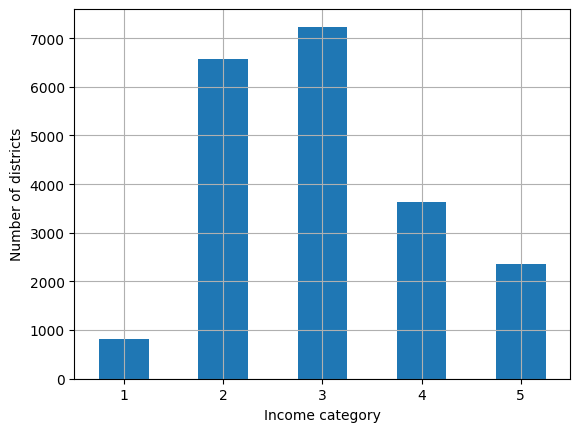

In [17]:
cat_counts.plot.bar(rot=0,grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

### Stratified(tabakalı) sampling

* SKlearn veri kümesini eiğtim ve test setini ayırmak için çeşitli stratejiler uygulayan bir dizi ayırıcı(splitter) sınıfını sklearn.model_selection paketinde sunar
* Her splitter aynı verinin farklı eğitim/test bölünmeleri üzerinde bir iterator(yineleyici) döndürüren split() methoduna sahiptir
* Daha net ifade ile split() metodu verinin kendisini değil,eğitim ve test indexlerini döndürür.Birden fazla splite sahip olmak modelin performansını daha doğru tahmin etmek istersek faydalı olabilir
* aşağıdaki kod aynı veri kümesi için 10 farklı strafied split(tabakalı bölünme) oluştrur


In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing_full,housing_full["income_cat"]):
    strat_train_set_n=housing_full.iloc[train_index]
    strat_test_set_n=housing_full.iloc[test_index]
    strat_splits.append([strat_train_set_n,strat_test_set_n])

In [19]:
strat_train_set,strat_test_set=strat_splits[0]
print(f"Train set boyutu: {len(strat_train_set)}")
print(f"Test set boyutu: {len(strat_test_set)}")


Train set boyutu: 16512
Test set boyutu: 4128


### stratify 

In [20]:
#kolay yolu
strat_test_set,strat_test_set=train_test_split(housing_full,test_size=0.2,stratify=housing_full["income_cat"],random_state=42)
print(f"Train set boyutu: {len(train_test)}")
print(f"Test set boyutu: {len(test_set)}")

Train set boyutu: 16512
Test set boyutu: 4128


In [21]:
#istediğimiz gibi strafy yapılıp yapılmadığını görmek için gelir kategorisi oranlarına bak
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [22]:
#tekrar income_cat kolonu kullanmayacağımız için droplayalım
for i in (strat_test_set,strat_train_set):
    i.drop("income_cat",axis=1,inplace=True)

/var/folders/8t/4hwy191n77l1dk_fgs1lrysc0000gn/T/ipykernel_7174/2397783370.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop("income_cat",axis=1,inplace=True)


In [23]:
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3905,-121.95,37.11,21.0,2387.0,357.0,913.0,341.0,7.7360,397700.0,<1H OCEAN
16821,-118.01,33.89,36.0,1589.0,265.0,804.0,272.0,4.6354,202900.0,<1H OCEAN
2900,-118.18,33.74,30.0,5915.0,1750.0,2136.0,1503.0,4.0968,310000.0,NEAR OCEAN
7193,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
13928,-122.39,37.78,5.0,1405.0,515.0,725.0,392.0,3.6037,187500.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
12369,-124.16,40.79,46.0,3042.0,597.0,1206.0,541.0,2.1135,90600.0,NEAR OCEAN
8707,-119.01,35.39,29.0,1820.0,459.0,1134.0,419.0,1.8289,59400.0,INLAND
16634,-123.01,38.67,33.0,914.0,147.0,394.0,132.0,4.6875,246200.0,<1H OCEAN
9779,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721,214700.0,NEAR BAY


## Exploring the data(Veriyi keşfetme)

* Amaç veriyi daha derinlemesine incelemek
* test kümesini kenara koyup sadece eğitim kümesini(training set) incele
* eğitim kümesi çok büyük ise keşif aşamasında işlemleri kolay ve hızlı hale getirmek için exploration set(keşif alt kümesi) örneklenebilir
* eğitim kümesi üzerinde çeşitli dönüşümler(transformations) deneyeceğimiz için sonrasında geri dönebilimek amacıyla datasetinin bir kopyasını oluştur

In [24]:
housing=housing_full.copy()

### Visualizing Geographical Data

* Veri kümesi enlem boylam içerdiği için veriyi görselleştirmek için tüm districtlerin scatterplotunu oluştur

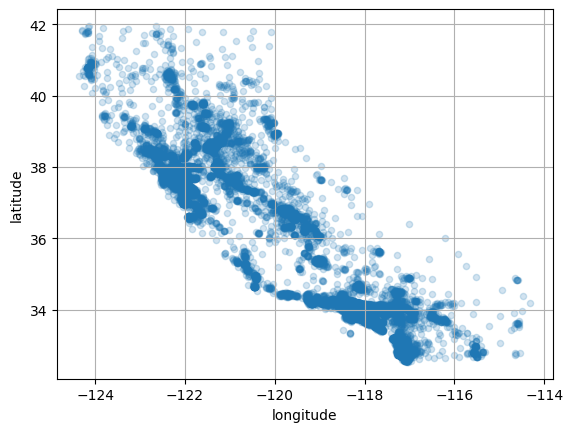

In [25]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
#alpha yüksek yoğunluklu yerleri daha belirgin yapar
plt.show()

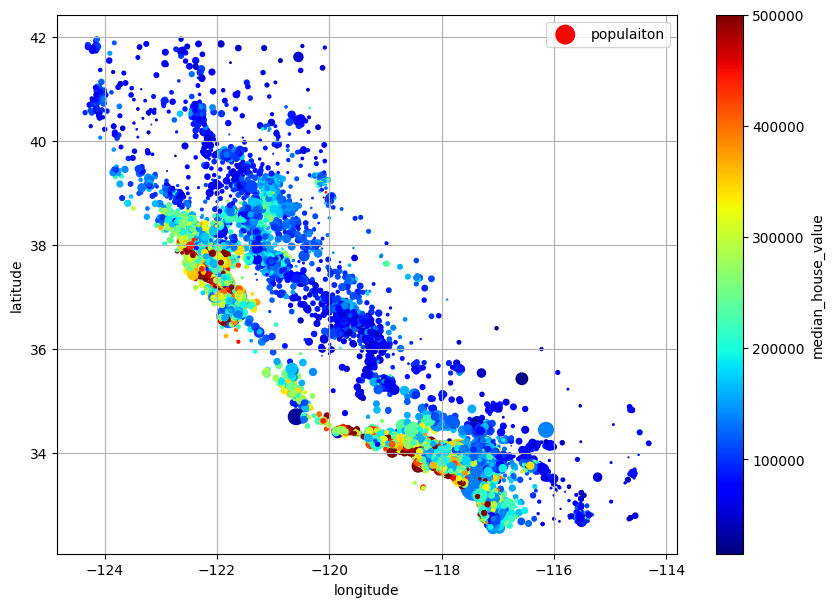

In [26]:
# housing prices bakalım
# her dairenin yarıcapı, districtin nufusunu temsil eder=
# renk fiyatu gösterir=c
# önceden tanımlı renk haritası="jet"
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,
             s=housing["population"]/100,
             label="populaiton",
             c="median_house_value",
             cmap="jet",colorbar=True,figsize=(10,7),sharex=False)
plt.legend()

In [27]:
# bu görsel konut fiyatlarının konumla(okyanusa yakınlık) ve nufus yoğunluğuyla oldukça ilişkili olduğunu gösterir
"""
* bir kümeleme algoritması(clustering alg), ana kümeyi (main cluster) tespit etmek ve
küme merkezlerine olan yakınkığı ölcen yeni featureslar eklemek açısından faydalı olabilir

"""

'\n* bir kümeleme algoritması(clustering alg), ana kümeyi (main cluster) tespit etmek ve\nküme merkezlerine olan yakınkığı ölcen yeni featureslar eklemek açısından faydalı olabilir\n\n'

### Correlations

* Veri kümesi çok büyük olmadığı için her numerical attribute arasındaki standart korelasyon katsayısını(Pearson's r) corr() yöntemi ile hesaplayaiblir

In [28]:
housing.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [29]:
#median_house_value ile diğer attributelar arasındaki korelasyonlar
housing.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

* median_house_value, median_income arttığında yükselme eğilimindedir.
* latitude ile median_house_value arasında hafif nefatif corr vardır(kuzeye gittikçe fiyatlar düşme eğiliminde)
* o yakın katsayılar doğrusal koreleayon olmadığını gösterir

### scatter_matrix()
* başka bir yoldur
* şu anda 9 sayısal özellik bulunduğu için 81 grafik elde edilir, bu sayfaya sığmaz
* median_house_value ile en çok ilişkili görülen özelliklere odaklanacaz

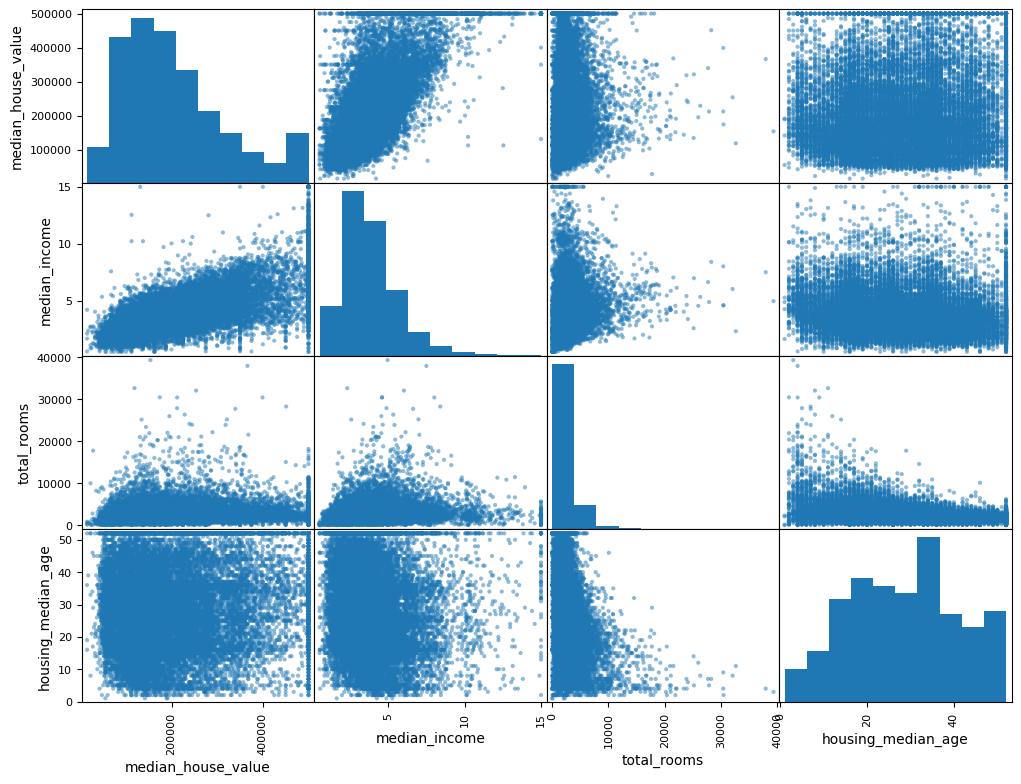

In [30]:
from pandas.plotting import scatter_matrix
attributes=["median_house_value","median_income","total_rooms",
            "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,9))
plt.show()

<Axes: xlabel='median_income', ylabel='median_house_value'>

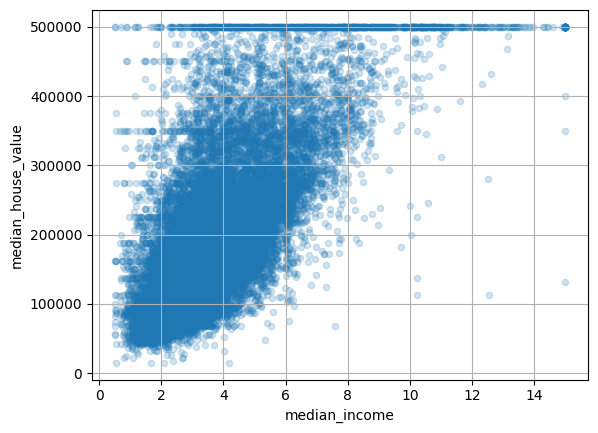

In [31]:
#grafiklere bakıldığında median_house_value yu tahmin etmek için en umut verici
#özellik "median_income" olduğu görülüyor
# Bu nedenle bu iki değişkenin scatterplotuna yakından bak
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.2,grid=True)

### Öznitelik (Attribute) KOmbinasyonlarıyla Deney Yapmak

* Veriyi makine öğrenmesi algoritmalarına hazırlamadan önce çeşitli öznitelik kombinasyonları denenebilir
* Örneğin bölgedeki toplam oda sayısı,kaç ev bulunduğunu bilmeden çok yararlı değldir.Aslında istediğimiz şey "rooms per househoold"
* toplam yatak odası sayısı da tek başına anlamlı değildir.
* ayrıca hane başına nufus da incelenmeye değer bir öznitelik kombinasyonudur

In [32]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5


In [33]:
housing["rooms_per_house"]=housing["total_rooms"] / housing["households"]
housing["bedroons_ratio"]=housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"]=housing["population"] / housing["households"]

In [34]:
housing.head(1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_house,bedroons_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5,6.984127,0.146591,2.555556


In [35]:
#tekrar corr() bakalım
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedroons_ratio       -0.255880
Name: median_house_value, dtype: float64

* yeni oluşturulan bedrooms_ratio özniteliği,median_house_value ile "total_rooms" ve "total_bedrooms"'dan daha güçkü korelasyon göstermektedir.
* bu güçlü negatif korelasyondur
* ayrıca rooms_per_house özniteliği "total_rooms"'dan daha açıklayıcıdır

* Yeni combined öznitelikler oluştururken, bunların mevcut öznitelikle ile çok fazla doğrusal(linearly) korelasyonlu olmadığından emin ol
* mevcut özniteliklerin basit ağırlıklı toplamlarından(simple weighted sums) kaçının

* bu keşif(exploration) aşamasının çok detaylı olması gerekmez
* amaç makul derecede iyi bir prototip oluşturmamıza yardımcı içgörüler(insights) kazanmaktır
* bu yinelemeli(iterative) bir süreçtir,prototip çalıştıktan sonra çıktıyı analiz edip yeni içgörüler elde edip bu keşif aşamasına geri dönülebilir

## Prepare the Data for Machine Learning Algorithms

* veriyi Ml algoritmalarına hazırlamak için fonksiyonlar yazılmalı
* bu sayede dönüşümleri(transformations) herhangi bir veri kümesinde yeniden uygulayabiliriz
* gelecektek tekrar kullanabilecek dönüşüm fonksiyonları kütüphanesi(library of transformation functions) oluşturmuş olursunuz.
* bu fonksiyonları live sistemde de yeni verileri algoritmanıza göndermeden önce dönüştürmek için kullanabilirsin
* böylece farklı transformation fonksiyonları denenebilir, hangisi en iyi sonucu veriyor görürsün
* temiz eğitim kümememiz olan(clean training set) strat_train_set'i kopyalayıp,predictor ve label olarak ayıaracaz.
* drop() methodu verinin kopyasını oluşturur veriyi etkilemez

In [36]:
strat_train_set.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN


In [37]:
housing=strat_train_set.drop("median_house_value",axis=1)
housing_labels=strat_train_set["median_house_value"].copy()
print(f"Predictor shape:{housing.shape}")
print(f"Label shape:{housing_labels.shape}")


Predictor shape:(16512, 9)
Label shape:(16512,)


In [38]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN


# Clean the Data

* Coğu ML algoritmaları eksik verilerle çalışmaz.
* Örneğin "total_bedrooms" özniteliği missing valueslara sahip.Bu durumu düzeltmek için
* ilgili districti kaldırabilirsiniz
* ilgili özniteliği(attribute) kaldırabilirsin
* eksik verileri belirli bir değerle doldurabilirsin.Bu işleme imputation(tamamlama) denir
* bu işlemleri dropna(), fillna(), ve drop() metotları ile gerçekleştirebilirsin

In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [40]:
"""
housing.dropna(subset=["total_bedrooms"],inplace=True)#option1
housing.drop("total_bedrooms",axis=1,inplace=True) #option2

median=housing["total_bedrooms"].median()
housing["total_bedrooms"]=housing["total_bedrooms"].fillna(median)#option3

"""

'\nhousing.dropna(subset=["total_bedrooms"],inplace=True)#option1\nhousing.drop("total_bedrooms",axis=1,inplace=True) #option2\n\nmedian=housing["total_bedrooms"].median()\nhousing["total_bedrooms"]=housing["total_bedrooms"].fillna(median)#option3\n\n'

* en az veri kaybına yol açtığı için 3. tercih edilebilir.
* Sklearn sınıfı SimpleImputer 3. yol için daha kullanışlıdır
* Her feature'ın medyan değerini saklar.
* Bu sayede sadece eğitim kümesindeki eksik değerleri değil,aynı zamanda validation set,test set ve modele sunulan yeni verilerdeli eksik değerleri de median ile doldurabilirsin(ımpute) 

In [41]:
#Kullanmak için önce SımpleImputer örneği(ınstance) oluşturulur
# Her özniteliğin eksik değerlerini o özniteliğin median değeri ile değiştirmek istediğini belirtirsin

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")

* median sadece sayısal öznitelikler(numerical attributes) için hesaplanabildiğinden, verinin sadece  sayısal özniteliklerini içeren kopyasını oluşturmak gerekecek
* metin türündeki(text attribute) öznitelikleri hariç tutulur bu işlemde

In [42]:
housing_num=housing.select_dtypes(include=np.number)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


* şimdi fit() methodu ile imputer örneğini(instance) eğitim verisine fit et

In [43]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

* Imputer her özniteliğin medianını hesaplayarak sonucu kendi "statistic_" örnek değişkeninde(instance variable) saklar.
* total_bedrooms özniteliğinde eksik değerler vardı.
* sistemi canlıya(live) alındıktan sonra yeni verilerde eksik değerlerin olmayacağından emin olamazsınız
* imputer'ı tüm sayısal özniteliklere uygulamak daha güvenlidir

In [44]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [45]:
print(housing_num.shape)
print(len(housing_num.values))
housing_num.median().values

(16512, 8)
16512


array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

* şimdi eğitilmiş(trained) imputer ile eğitim kümesindeki eksik değerleri ,öğrenilen  medyanlarla değiştirip dönüştürebiliriz

In [46]:
X=imputer.transform(housing_num)

* eksik değerler şu stratejiler ile de doldurulabilir
* ort değer strategy="mean"
* en sık görülen değer strategy="most_frequent"
* sabit bir değerle strategy="constant",fill_value=...

* son 2 strateji sayısal olmayan veriler için de kullanılabilir

### sklearn.impute detay

sklearn.impute paketinde, sadece numerical features için kullanılabilen daha gelişmiş impter yöntemleri de vardır

* KNNImputer=Her bir eksik değeri,o özelliğin en yakın k komşusunun değerlerinin ortalaması ile değiştirir.Burdaki mesafe(distance) mevcut tüm özellikler temel alınarak yapılır
* İterativeImputer= Her özellik(feature) için,diğer tüm mevcut özellikleri kullanarak eksik değerleri tahmin eden bir regression model eğitir.ardından modeli güncellenmiş veriler üzerinden yeniden eğitir ve bu işlemi birkaç kez tekrarlayarak, her yinelemede(iteration) modeli ve yerleştirilen(ımputed) değerleri iyileştirir

## SCIKIT-LEARN DESIGN

* Sklearn API çok iyi tasarlanmıştır.temel prensibler şu şekildedir

### Consistency(Tutarlılık)
* Tüm nesneler,tutarlı ve basit bir arayüz(interface) paylaşır

### Estimators(Tahmin Ediciler)
* Bir veri kümesine(dataset) dayalı olarak bazı parametreleri tahmin edebilen her nesneye estimator denir.(SimpleImputer gibi).Tahmin işlemi fit() methodu ile olur ve bu method veri kümesini parametre olarak alır.Denetimli öğrenme algoritmalarında ise ikinci bir veri kümesi(labels) de parametre olarak verilir

* Tahmin sürecini yönlendirmek için gereken diğer her parametre ,hiperparametre(hyperparameter) olarak kabul edilir(simpleımputerın strategy parametresi gibi) ve bunlar her bir örnek değişken(instance variable) olarak ayarlanır.

### Transformers(Dönüştürücüler)
* Bazı estimatörler(SimpleImputer) bir veri kümesini dönüştürebilir, bu tür nesnelere transformer denir.API yine basittir.Dönüşüm işlemi transform() methoduyla yapılır ve dönüştürüliecek veri kümesi bu methoda parametre olarak veirlir
* Metot, dönüştürülmüş veri kümesini döndürür.Du dönüşüm genellikle öğrenilen parametrelere dayanır. Tüm transformerlarda ayrıca fit_transform() adlı kullanışlı metod bulunur. fit() ardından transform() çağırmak ile aynı işlemi yapar

### Predictors(Tahminleyiciler)

* Bazı estimatörler bir ver kümesi verildiğinde tahmin yapabilir.bunlara predictor denir(LİnearRegression gibi)
* Predictor yeni örneklerin(instances) bulunduğu veri kümesini parametre olarak alan ve bunlara karşılık gelen tahminleri döndüren predict() methoduna sahiptir.
* Ayrıca test kümesi ve denetimli öğrenmede etiketler verildiğinde tahminlerin kalitesini ölçen score() metoduna sahiptir

### Inspection(inceleme)
* Her estimatorün hiperparametrelerine, doğrudan herkese açık(public) örnek değişkenler aracılığıyla erişilebilir(imputer.strategy gibi).Öğrenilmiş(learned) parametreler ise alt çizgi(_) ekiyle biten örnek değişkenler aracılığıyla erişilebilir

In [47]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

### Nonproliferation of Classes(Sınıf Çoğalmasının Önlenmesi)
* Veri kümeleri,özel sınıflar(homemade classes) yerine Numpy array veya scipy sparse matrix biçiminde temsil edilir.
* Hiperparametreler yalnızca normal python string veya number tiplerindedir

### Composition(Bileşim)
* Mevcut yapı taşları(building blocks) olabildiğince yeniden kullanılır.
* Örneğin bir dizi transformerın ardından gelen bir estimator'dan kolayla "Pipeline"oluşturabilir

### Senisible Defaults(mantıklı varsayılanlar)
* sklearn coğu parametre için makul varsayılan(default) değerler sağlar.Böylece hızlı bir şekilde temel düzeyde çalışan bir sistem oluşturmak kolaylaşır

* sklearn transformersları input olarak Pandas df almış olsa da çıktı olarak numpy array veya scipy sparse matrix üretir
* bu yüzden imputer.transform(housing_num) çıktısı bir numpy arraydir
* X değişkeni ne sutun adına ne de indexe sahiptir
* X'i bir dataframe içine atmak ve sutun adlarını ile index bilgilerini "housing_num" dan geri almak kolaydır

In [48]:
print(type(housing_num))
type(X)

<class 'pandas.core.frame.DataFrame'>


numpy.ndarray

In [49]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
type(housing_tr)

pandas.core.frame.DataFrame

## Handling Text and Categorical Attributes

* Veriniz metin öznitelikleri(text attributes) içerebilir
* elimizdeki veri setinde bir tane text attribute var."ocean_proximity"

In [50]:
housing_cat=housing[["ocean_proximity"]]
print(housing_cat["ocean_proximity"].unique())
housing_cat.head()

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN


* Bu metinler rastgele değildir.Her biri kategoriyi temsil eden sınırlı sayıda olası değer vardır
* Bu sebeble bu öznitelik kategorik özniteliktir(categorical attribute)
* Bu kategorik metinleri sayılara dönüştür
* Bunun için sklearn "OrdinalEncoder" sınıfını kullanabiliriz

In [51]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

* Kategorilerin listesini "categories_" adlı instance variable kullanarak göreiblirsiniz.

In [52]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

* ordinal encoder'da sorun Ml algoritmalarının birbirine yakın değerlerin uzak değerlere göre daha benzer olduğunu varsaymasıdır.
* bu bazı durumlarda uygundur(örneğin kötü,orta,iyi gibi sıraları(ordered) kategoriler için)
* ocean_proximity sütünı için açıkca doğru dğeildir.
* bu sorunu gidermek için her bir kategori için ayrı  ikili(binary) öznitelik oluşturulur
* öznitelik "<1H OCEAN" kategorisinde ise 1 aksi halde 0 değerini alır
* bu yönetem ONE HOT ENCODING demir.bir öznitelik 1(hot) olurken diğerleri 0(cold) kalır.Bazen de dummy attributes(kukla değişkenler) denir
* Sklearn kategorik deperleri one-hot vektörlerine(one-hot vectors) dönüştürmek için OneHotEncoder sınıfını sağlar
* çıktısı default olarak scipy sparse şeklindedir

In [53]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [54]:
type(housing_cat_1hot)


scipy.sparse._csr.csr_matrix

* sparse matrix(seyrek matrix), coğunluğu sıfırlardan oluşan matrisler için son derece verimli bir gösterim biçimidir.
* çünkü dahili olarak yalnızca sıfır olmayam değerleri(nonzero values) ve bunların konumlarını saklar
* numpy arraye dönüştürmek için toarray() metodunu çağırmak yeterlidir

In [55]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]], shape=(16512, 5))

* alternatif olarak OneHotEncoder ı yaratırken sparce_output=False ayarlayabilirsin

In [56]:
cat_encoder=OneHotEncoder(sparse_output=False)
housing_cat_1hot=cat_encoder.fit_transform(housing_cat) #now array

In [57]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

* Pandas'ta her kategorik özellikiği one-hot gösterimine dönüştüren get_dummies adlı bir fonksiyon bulunur
* Bu fonksiyon her kategori için binary özellik oluşturur

In [58]:
#deneme için
df_test=pd.DataFrame({"ocean_proximity":["INLAND","NEAR BAY"]})
df_test

,ocean_proximity
0,INLAND
1,NEAR BAY


In [59]:
pd.get_dummies(df_test,dtype="int")

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,1,0
1,0,1


* onehotencoder'ın "get_dummies" dan avantajı eğitildiği kategorileri hatırlamasıdır.
* bu önemlidir çünkü model üretim ortamına geçtiğinde, eğitim sırasında kulanılanla tam olarak aynı özellikleri(features) almalıdır.

In [60]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

* farklı olarak get_dummies() sadece iki kategori gördüğü için iki sutun üretti
* onehotencoder ise öğrenilen her kategori için doğru sırayla bir sutun oluşturdu

* ayrıca get_dummies() fonksiyonuna bilinmeyen bir kategori(<2H OCEAN) içeren bir df verilirse bunu hiç uyarı vermeden kabul eder ve bu kategori için yeni bir sutun oluşturur.

In [61]:
df_test_unknown=pd.DataFrame({"ocean_proximity":["<2H OCEAN","ISLAND"]})
pd.get_dummies(df_test_unknown,dtype="int")

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,1,0
1,0,1


* OneHotEncoder daha akıllıdır.Bilinmeyen kategoriyi(unknown category) algılar ve hata(exception) oluşturur
* İstersek handle_unknown hiperparametresini "ignore" yaparak bilinmeyen kategori yalnızca sıfırdan oluşan bir vektör ile temsil edilir

In [62]:
##cat_encoder.transform(df_test_unknown)hata

In [63]:
cat_encoder.handle_unknown="ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

* bir kategorik özelliğin çok sayıda olası kategorisi var ise.One hot encoding işlemi çok sayıda girdi özelliği oluşturur.Bu durum eğitim sürecini yavşlatır ve model performansını düşürür
* böyle bir durumda kategorik girdiyi o kategorilerle ilişkili anlamlı sayısal özelliklerle değiştirebilirsiniz.Örneğin "ocean_proximity" özelliğini okyanusa olan mesafe ile değiştirebilirsiniz
* Yapay sinir ağları(neural networks) ile çalışırken her kategoriyi embedding adı verilen öğrenebilir(learnable) ve düşük boyutlu bir vektörle değiştirebilirsiniz.
* Bu temsil öğrenmesi(representation learning) örenğidir

* bir sklearn estimatorunu bir df ile eğittiğinizde estimator sutun adlarını feature_names_in adlı öznitelikte saklar
* daha sonra sklearn bu estimatora sonradan verilen(örnek oalrak transform() veya predict() için kullanılan) herhangi bir df'in aynı sutun adlarına sahip olmasını garanti eder
* ayrıca transformer nesneleri, çıktısı etrafında bir df oluşturmanızı sağlayan get_feature_names_out() adlı bir metoda sahiptir

In [64]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [65]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [66]:
df_output=pd.DataFrame(cat_encoder.transform(df_test_unknown),
                       columns=cat_encoder.get_feature_names_out(),
                       index=df_test_unknown.index)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


## Feature Scaling and Transformation

* verinize uygulanması gereken en önemli dönüşümlerden(transformations) biri özellik ölçekleme(feature scalingd) işlemidir
* bir kaç istisna dışında ml algoritmaları girdi olarak veirlen sayısal öznitelikler çok farklı ölçeklere sahipse iyi performans göstermez
* toplam oda sayısı yaklaşık 6 ila 39.320 arasındadır
* medyan gelir ise 0-15 arasındadır
* ölçekleme yapılmadığında coğu model medyan geliri göz ardı edip oda sayısına daha fazla ağırlık verir
* tüm öznitelikleri aynı ölçeğe getirmek için Min-Max scaling ve standardization yöntemleri kullanılır

* tüm estimatörlerde olduğu gibi scalerin da sadece eğitim verisine(training data) göre fit edilmesi önemlidir
* fit ya da fit transform metodlarını eğitim verisi hariç hiçbir veri üzerinde kullanmayın
* bir kez eğitilmiş(trained) bir scaled elde ettiğimizde bunu validation set ,test set ve yeni veriler dahil olmak üzere diğer tüm veri kümelerini dönüştürmek(transform()) için kullanabiliriz
* eğitim kümesindeki değerler her zaman belirtilen aralığa göre ölceklenir. ancak yeni veriler aşırı uç değerler içerirse bunalr ölçeklemenin aralığına taşabilir
* bunu engellemek için clip parametresini True ayarlamak lazımdır 

### min-max scaling
* bir çok kişi normalization olarak adlandırır.en basit ölçekleme tekniğidir
* her öznitelik için değerler kaydırılıp tekrar ölçeklenir böylece sonuçlar 0 ila 1 arası yer alır
* bu işlem her değerden min değerin çıkarılması ve elde edilen değerin maksimum ve minimum değer farkına bölünmesi ile olur


* sklearn bu işlem için MinMaxScaler adlı bir dönüştürücü(transformer) sağlar.bu sınıfın "feature_range" adlı hiperparametresi vardır bu sayede 0-1 arası değer istemiyorsak belirtebiliriaz
* örneğin neural networks sıfır ortamalı(zero-mean) girdilerle daha iyi çalıştığından -1 ila 1 aralığı tercih edilebilir 

In [67]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
housing_num_min_max_scaled=min_max_scaler.fit_transform(housing_num)

In [68]:
housing_num_min_max_scaled

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]], shape=(16512, 8))

### Standardization

* Standardizasyon farklı bir yöntemdir
* Önce ortalama değeri çıkarılır,böylece standartlaştırılmış değerlerin ortaması sıfır olur,ardından sonucu standart sapmaya böler,böylece değerlerin standard sapması 1'e eşit olur
* min-max'den farklı olarak değerleri belli bir aralıkta sınırlamaz.Ancak standardizasyon aykırı değerlerden daha az etkilenir
* örnek olarak bir districtin medyan gelirinin hatayla 100 girildğini varsayalım(normalde 0-15).min-max ölcekleme bu değeri 0-1 aralığında 1'e eşitleyecek diğer tüm değerleri ise 0.15 aralığına sıkıştıracaktır
* standardizasyon ise bu tür uç değerlerden fazla etkilenmez
* sklearn standardizasyon işlemi için StandardScaler adlı bir dönüştürücü(transformer) sağlar

In [69]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
housing_num_std_scaled=std_scaler.fit_transform(housing_num)
housing_num_std_scaled

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]], shape=(16512, 8))

* Bir sparse matrix'i önce yoğun(dense) bir matrise dönüştürmeden ölçeklemek(scale etmek) istersek StandarScaler kullanabilir ve with_mean hiperparametresini False olarak ayarlarız
* Bu durumda StandardScaler sadece verileri standart sapmaya böler, mean değeri çıkarmaz(mean'in çıkarılması matrisin seyrekliğini(sparsity)) bozar

### Advance Bilgiler
* Bir özelliğin(feature) dağılımı ağır kuyruklu(heavy tail) olduğunda(yani ortalamadan uzak değerler üstel olarak nadir görülmedğinde) hem min-max ölçekleme hem de standardizasyon çoğu değeri dar bi aralığa sıkıştırır

* Ml modelleri genellikle bu durumu .Bu nedenle ölçekleme yapmadan önce dağılımın ağır kuyruğunu daraltaracak(shrink) ve mümkünse dağılımı yaklaşık simetrik(roughly symmetrical) hale getirecek bir transformation uygulanır

* Örneğin sağa çarpık(right-skewed) pozitif özellikler için yaygın bir yaklaşım,özelliği kareköküyle değiştirmek veya özelliği 0ile 1 arasında bir kuvvete yüksekltmektir
* eğer özellik gerçekten çok uzun ve ağır bir kuyruk gösteriyorsa o zaman özelliği logaritmasıyla değiştirmek işe yarayabilir
* Örneğin nufus özelliği kabaca bir güç yasası dağılımına uyar.10 bin nufuslu bölgeler bin nufuslu bölgelerden yalnızca 10 kat daha az sıklıkta görülür,üstel olarak daha nadir değildir

* Ağır kuyruklu özelliklerle başa çıkmanın bir dğer yolu özelliği kovalaştırmak(bucketizing) yani bölümlere ayırmaktır.
* Bu,özelliğin dağılımını yaklaşık olarak eşit büyüklükte kovalara(buckets) bölmek ve her bir özelliğin değerini ait olduğu kova indeksine(bucket index) dönüştürmek anlamına gelir.
* Örneğin her değeri yüzdelik dilimi ile değiştirebiliriz.Eşit büyüklükte kovalarla yapılan bucketizing dağılımı nerdeyse uniform(düzgün) hale getirir, bu durumda ek bir ölçeklemeye gerek kalmaz

------------------------------------------------------------------

* Şimdiye kadar sadece input featureslara baktık. Ancak hedef değerlerin de dönüştürülmesi gerekebilir
* Örneğin hedef dağılımı ağır kuyruklu bir yapıya sahipse hedef değişkeni logaritmasıyla değiştirmeyi deneyebiliriz
* Fakat bunu yapınca model artık median_house_value'yu değil onun logaritmasını tahmin eder
* Bu sebeble median_house_value için tahmin edilenin üst değerini hesaplarız
* neyse ki sklearndeki çoğu dönüştürücü(transformer) uyguladığı dönüşümün tersini kolayca hesapmaka için inverse_transform() metoduna sahiptir
* asağda etiketli StandardScaler ile ölçeklendirmeyi ardından ölçeklendirilmiş etiketler üzerinde basit bir linear regression modeli eğitmeyi ve yeni verilerde tahmin ettikten sonra sonuuçları eğitilmiş scalerın inverse_transform() metoduyla orijinal ölçepe geri dönüştüren kod örneği vardır
* dikkat edilmesi gereken standardscaler'ın 2D girdi beklemesidir. Bu nedenle etiketler Pandas Series yerine DF'te döüştürülür.Ayrıca bu örnekte model sadece tek bir ham girdi özelliği(median income) üzerinde eğitilmiştir

In [70]:
type(housing_labels)

pandas.core.series.Series

In [71]:
from sklearn.linear_model import LinearRegression
target_scaler=StandardScaler()
scaled_labels=target_scaler.fit_transform(housing_labels.to_frame())

In [72]:
model=LinearRegression()
model.fit(housing[["median_income"]],scaled_labels)
some_new_data=housing[["median_income"]].iloc[:5] #yeni data gibi davranak

scaled_predictions=model.predict(some_new_data)
scaled_predictions


array([[-0.64466228],
       [ 0.80674175],
       [-0.52302364],
       [-0.5853166 ],
       [-0.12415952]])

In [73]:
predictions=target_scaler.inverse_transform(scaled_predictions)
predictions

array([[131997.15275877],
       [299359.35844434],
       [146023.37185694],
       [138840.33653057],
       [192016.61557639]])

* bu yöntem iyi çalışır ancak olası ölçekleme uyuşmazlıklarını(scaling mismatches) önlemek ve süreci daha basit hale getirmek için TransformedTargetRegressor kullanmak daha uygun ve hata olasılığı daha düşüktür
* Bunun için sınıfı oluştururken regresyon modelini ve etiket dönüştürücüyü(label transformer) belirtmektir
* Ardından modeli ölçeklenmemiş etiketlerle birlikte eğitim kümesi üzerinden fit() edebiliriz

In [74]:
from sklearn.compose import TransformedTargetRegressor
model=TransformedTargetRegressor(LinearRegression(),transformer=StandardScaler())
model.fit(housing[["median_income"]],housing_labels)
predictions=model.predict(some_new_data)
predictions

array([131997.15275877, 299359.35844434, 146023.37185694, 138840.33653057,
       192016.61557639])

### Custom Transformers(Özel Dönüştürücler)
* Sklearn birçok yararlı dönüştürücü(transformer) sunsa da bazen özel dönüşümler(custom transformations),veri temizleme işlemeri(cleanup operations) veya belirli özniteliklerin birleştirilmesi(combining specific attributes) gibi görevler için kendi dönüştürücümüzü yazmamız gerekebilir
* eğer dönüşüm herhangi bir training gerektirmiyorsa sadece bir numpy array girdi alıp dönüştürülmüş bir array döndüren fonksiyon yazmak yeterlidir
* örnek olarak daha önce tartışıldığı gibi ağır kuyruklu dağılıma sahip özellikleri dönüştürmek için bu özelliklerin yerine logaritmalarını almak iyi fikirdir.
* Bir log-transfomer oluşturup bunu "population" özelleğine uygulayalım

In [75]:
housing[["population"]]

,population
13096,1576.0
14973,666.0
3785,562.0
14689,1845.0
20507,1912.0
...,...
14207,938.0
13105,1419.0
19301,2814.0
19121,1725.0


In [76]:
from sklearn.preprocessing import FunctionTransformer
log_tranformer=FunctionTransformer(np.log,inverse_func=np.exp)
log_pop=log_tranformer.transform(housing[["population"]])
log_pop

,population
13096,7.362645
14973,6.501290
3785,6.331502
14689,7.520235
20507,7.555905
...,...
14207,6.843750
13105,7.257708
19301,7.942362
19121,7.452982


* inverse_func argümanı isteğe bağlıdır.Bu argüman örneğin tranformer'ımızı bir TransformedTargetRegressor(dönüştürülmüş hedef regresörü) içinde kullanmayı planlıyorsak,ters dönüşüm fonksiyonunu belirtmemizi sağlar
* dönüşüm fonksiyonu hiperparametreler alabilir.
* aşağda Gaussian RBF benzerlik ölçüsünü hesaplayan bir transformers oluşturulmuştur

In [77]:
from sklearn.metrics.pairwise import rbf_kernel
rbf_transformer=FunctionTransformer(rbf_kernel,kw_args=dict(Y=[[35.]],gamma=0.1))
rbf_transformer.transform(housing[["housing_median_age"]])

array([[2.81118530e-13],
       [8.20849986e-02],
       [6.70320046e-01],
       ...,
       [9.55316054e-22],
       [6.70320046e-01],
       [3.03539138e-04]], shape=(16512, 1))

## Transformation Pipelines()
* Doğru sırada yürütülmesi gereken bir çok veri dönüşüm adımı vardır
* Sklearn bu tür dönüşüm dizilerini yönetmeye yardımcı olmak için Pipeline class'ı sağlar
* Aşağdaki örnek veriyi impute edip,giriş özelliklerini scale edecektir

In [78]:
from sklearn.pipeline import Pipeline
num_pipeline=Pipeline([
    ("impute",SimpleImputer(strategy="median")),
    ("standardize",StandardScaler())
])

* pipeline constructor(yapıcı) adım sırasını tanımlayan name/estimatör çiftlerinden oluşan bir liste(2 tuple) alır
* isimler benzersiz oldukları ve alt çizgi içermedikleri sürece isteidğimiz gibi olabilir
* bu isimler daha sonra hyperparameter tuning(ayarlama) sırasında faydalı olur
* estimatorslerin hepsi transformer(dönüştürücü) olmalı(yani fit_transform() metoduna sahip olmalı)
* son ise herhangi bir şey olaiblir.transformer,predictor veya başka bir tür estimator(tahminleyici nesne) olabilir

* eğer transformers adlandırmak istemiyorsak bunu yerine make_pipeline fonkstiyonunu kullanabiliriz
* bu fonksiyon transformersları konumsal argüman(positional arguments) olarak alır ve bu dönüştürücülerin sınıf adlarını kullanakarak bir Pipeline oluşşturur.("simpleimputer" gibi)

In [79]:
from sklearn.pipeline import make_pipeline
num_pipeline=make_pipeline(SimpleImputer(strategy="median"),
                           StandardScaler())


* eğer birden fazla transformer aynı isme sahipse isimlerinin sonunca bir indeks eklenir("foo-1","foo-2" gibi)
* pipeline'nın fit() metodu çağırdılığında tüm transformerlar üzerinden sırasıyla fit_transform() işlemi gerçekleşir ve her çağrının çıktısı bir sonraki çağrıya parametre olarak aktarılır.bu süreç fit methodu çağrılan son estimator'a ulaşıncaya kadar devam eder.
* pipeline, son estimator ile aynı metodlara sahiptir. Örnekte son adım standartScaler olduğu için pipeline da bir transformer gibi davranır
* eğer pipelenın transform metodu çağrılırsa veri üzerinde tüm dönüşümler sırayla uygulanır.Ancak son adım predictor olsaydı,pipeline bir predcit() metodu içerirdi. bu durumda pipeline veriye tüm dönüşümleri ardışık şekilde uygulayıp sonucu predictor'ın predict() metoduna iletirdi
* aşağda pipeline'nın fit_transform metodunu çağıralım ve çıktının virgülden sonra iki başamağa yuvarlanmış ilk iki satırına bakalım

In [80]:
housing_num_prepared=num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

* eğer düzgün biçimlendirilmiş bi df elde etmek istersek, pipeline'nın get_feature_names_out() methodunu kullanırız

In [81]:
df_housing_num_prepared=pd.DataFrame(housing_num_prepared,columns=num_pipeline.get_feature_names_out(),index=housing_num.index)
df_housing_num_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365
...,...,...,...,...,...,...,...,...
14207,0.586397,-0.833359,0.987087,-0.184147,0.140152,-0.445315,0.060101,0.444041
13105,0.131525,0.319822,-0.443146,0.139847,0.128298,-0.005950,0.083608,-0.685630
19301,1.256209,-1.428701,-1.237721,0.586026,0.562134,1.268299,0.679135,0.101049
19121,0.586397,-0.739605,0.669257,0.522417,0.794461,0.273563,0.882868,0.145396


* Pipeline'lar indekslemeyi destekeler. Örneğin pipeline[1] pipeline içindeki ikinci estimatör'ü döndürür ve pipeline[:-1] son estimatör hariç tüm estimatörleri içereren bir Pipeline nesnesi döndürür

In [82]:
num_pipeline[::]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

* estimatörlere ayrıca steps niteliği(attribute) aracılığıyla da erişebiliriz.bu nitelik isim/estimatör çiftlerinden oluşan bir listedir. Ya da "named_steps" adlı sözlük niteliği üzerinden erişebiliriz. bu da isimleri estimatorlere eşler(mapping)

### ColumnTransformer
* şimdiye kadar kategorik sutunları ve sayısal sutunları ayrı ayrı ele aldık.Her sutuna uygun dönüşümleri uygulayabilen tek bir dönüştürücüye(transformer) sahip olmak daha kullanışlı olur
* bunun icin ColumnTransformer kullanabiliriz.Aşağdaki ColumnTransformer sayısal özniteliklere(attributes) biraz önce tanımladığımız num_pipeline'ı, kategorik özniteliklere ise cat_pipeline'ı uygular

In [83]:
from sklearn.compose import ColumnTransformer
num_attribs=["longirude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income"]
cat_attribs=["ocean_proximity"]

cat_pipeline=make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",cat_pipeline,cat_attribs)
])

* Önce sayısal ve kategorik sutun adlarının listesini tanımlayıp,kategorik öznitelikler için basit bir pipeline oluşturuyoruz.
* Daha sonra ColumnTransformer oluşturuyoz.Bu sınıfın yapıcısı(constructor), her biri bir isim(benzersiz olmalı ve çift alt çizgi icermemeli), bir dönüştürücü(transfomer) ve dönüşütürücünün uygulanacağı sutun adlarını(veya indexleri) içeren üçlülerden(tuple) bir liste gerektirir.

------------------------------------------------------------------

* tüm sutun adlarını tek tek listelemek çok pratik değildir. sklearn belirli bir türdeki tüm featuresları otomatik olarak seçmek için kullanılabilecek make_column_selector sınıfını sağlar
* sutun adları veya indexleri yerine bir seçiciyi(selector) ColumnTransformer'a iletebiliriz.
* ayrıca transformerlara isim vermek yerine "make_column_transformer()" fonksiyonunu kullanabiliriz.Bu fonksiyon make_pipeline() gibi isimleri otomatik olarak atar.
* aşağdaki kod daha öncekiyle aynı ColumnTransformer'ı oluşturur.Tek fark transformerların "num" ve "cat" yerine otomatik olarak "pipeline-1" ve "pipeline-2" olarak adlandırılmasıdır.

In [84]:
from sklearn.compose import make_column_selector,make_column_transformer

preprocessing=make_column_transformer(
    (num_pipeline,make_column_selector(dtype_include=np.number)),
    (cat_pipeline,make_column_selector(dtype_include=object)))

housing_prepared=preprocessing.fit_transform(housing)
housing_prepared


array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]], shape=(16512, 13))

* artık tüm eğiitim veri setini alıp her transformerı ilgili sutunlara uygulayan ve ardından dönüştürülmüş(transformed) sutunları yatay olarak birleştiren bir ön işleme(preprocessing) pipeline'nımız var.
* Numpy dizisi döndürülür ama sutun adlarını preprocessing.get_feature_names_out() fonksiyonunu kullanarak alabilir ve DF içine yerleştirebilirz

### Tüm dönüşümleri gerçekleştirecek tek bir pipeline oluşturmak
* Sayısal özniteliklerdi eksik değerler, medyan ile doldurulacak.
* Kategorik özniteliklerdeki eksik değerler ise en sık görülen kategori ile değiştirilecek
* kategorik öznitelik,çoğu ML algoritması yalnızca sayısal girdileri kabul ettiği için one-hot encoding yöntemi ile değiştirilecek
* bazı oran temelli(ratio) öznitelikler hesaplanır eklenek.bedrooms_ratio,rooms_per_house,people_per_house. Bu öznitelikler median_house_value ile daha güçlü korelasyon göstermesi bekleniyor.
* uzun kuyruklu dağılıma sahip öznitelikler,logaritmaları alınarak dönüştürülecek.çünkü coğu model yaklaşık olarak düzgün(uniform) veya Gauss(gaussian) dağılımına sahip öznitelikleri tercih eder
* tüm sayısal öznitelikler standartlaştırılacak(standardized)

In [85]:

def column_ratio(X):
    return X[:,[0]]/ X[:,[1]]

def ratio_name(function_transformer,feature_names_in):
    return ["ratio"] #feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio,feature_names_out=ratio_name),
        StandardScaler()
    )

log_pipeline=make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log,feature_names_out="one-to-one"),
    StandardScaler())

default_num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())


preprocessing=ColumnTransformer([
    ("bedrooms",ratio_pipeline(),["total_bedrooms","total_rooms"]),
    ("rooms_per_house",ratio_pipeline(),["total_rooms","households"]),
    ("people_per_house",ratio_pipeline(),["population","households"]),
    ("log",log_pipeline,["total_bedrooms","total_rooms","population","households","median_income"]),
    ("cat",cat_pipeline,make_column_selector(dtype_include=object)),

],remainder=default_num_pipeline)#one column remaining=housing_median_age

In [86]:
housing_prepared=preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 16)

In [87]:
preprocessing

ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                             SimpleImputer(strategy='median')),
                                            ('standardscaler',
                                             StandardScaler())]),
                  transformers=[('bedrooms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function ratio_name at 0x13fb199e0>,
                                                                      func=<function column_ratio at 0...
                                                                      func=<ufunc 'log'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['total_bedrooms', 'total_rooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x13fa9e5d0>)])

In [88]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__longitude', 'remainder__latitude',
       'remainder__housing_median_age'], dtype=object)

## Select and Train a Model
* Veriyi topladık ve inceledik
* Eğitim ve test setlerini sampleladık
* veriyi otomatik olarak temizleyip ML algoritmalarına hazırlayacak bir ön işleme(preprocessing) pipeline'ı yazdık
* Artık bir ML modelini seçmeye ve eğitmeye hazırız

### Train and Evaluate on Training Set
* Veriyi eğitim seti üzerinde eğit ve değerlendir

In [89]:
from sklearn.linear_model import LinearRegression
lin_reg=make_pipeline(preprocessing,LinearRegression())
lin_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x13f...
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13fa9e5d0>)])),
                ('linearregression', LinearRegression())])

* Artık çalışan bir doğrusal regresyon modelimiz var
* Modeli eğitim seti üzerinde deneyip,ilk beş tahmine bakalım ve bunları gerçek etiketlerle karşılaştıralım

In [90]:
import warnings
warnings.filterwarnings("ignore")
housing_predictions=lin_reg.predict(housing)
housing_predictions[:5].round(-2) 


array([260100., 357900., 125800., 110000., 298900.])

In [91]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

* modelimiz çalışıyor ama sadece çalışıyor
* ilk tahmin oldukça hatalı(200.00 dolara yakın sapma)
* diğer tahminler ise ilkine göre daha iyi
* performans ölçütü(performance measure) olarak RMSE'i seçiyoruz
* bu yüzden regresyon modelinin tüm eğitim seti üzerindeki RMSE değerini sklearn'ün root_mean_square_error() fonksiyonunu kullanarak ölçmek istiyoruz

In [92]:
from sklearn.metrics import root_mean_squared_error
lin_rmse=root_mean_squared_error(housing_labels,housing_predictions)
lin_rmse

70630.22169174395

* bu çok da iyi bir skor değildir.Çoğu bölgenin median_housing_value 120.000 ila 265.000 dolar arasında değiştiği için,70.630 dolar tahmin hatası tatmin edici değildir.
* bu modelin eğitim verisini(trainin data) yeterince öğrenememesi(underfitting) durumuna örnektir. bu durum özniteliklerin(features) iyi tahminler yapmak için yeterli biilgi sağlamadığı ya da modelin yeterince güçlü olmadığı anlamına gelebilir.
* bu sorunu çözmeninin başlıca yolları modeli daha güçlü seçmek,eğitim algoritmasına daha iyi öznitelikler vermek veya model üzerindeki kısıtlamaları azaltmaktır
* bu model düzenlileştirilmediği(not regularized) için son seçenek devre dışı kalır.
* daha karmaşık modelin nasıl performans göstereceğini görmek için DecisionTreeRegressor kullanacağız.Çünkü bu model verideki nonlinear ilişkileri bulabilecek oldukça güçlü bir modeldir

In [93]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=make_pipeline(preprocessing,DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x13f...
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x13fa9e5d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [94]:
housing_predictions=tree_reg.predict(housing)
tree_rmse=root_mean_squared_error(housing_labels,housing_predictions)
tree_rmse

0.0

* hiç hata gözükmüyor mu ? bu model gerçekten kusursuz mu?
* modelin veriye aşırı uyum(overfit) sağlamış olması çok olasıdır
* daha önce öğrendiğimiz gibi güven duyduğumuz bir modeli canlıya almadan önce test setine dokunmak istemeyiz, bu yüzden eğitim setinin bir kısmını modelin eğitimi,bir kısmını da model doğrulaması(model validation) için kullanmamız gerekecek

### Çapraz Doğrulama(Cross Validation) Kullanarak Daha İyi Değerlendirme

* Decision tree modelini değerlendirmenin bir yolu train_test_split() fonksiyonunu kullanarak eğitim setini daha küçük bir eğitim ve bir doğrulama(validation) setine ayırmaktır
* Ardından modelleri küçü eğitim seti üzerinde eğitip, doğrulama seti üzerinde değerlendririz.
* Alternatif olarak sklearn'in k-fold cross-validation kullanılır
* Eğitim setini k adet,birbiriyle örtüşmeyen(nonoverlapping) alt kümeye(subset)-yani fold'a- böleriz.
* daha sonra modeli "k" kez eğitir ve değerlendiririz.her seferinde farklı bir fold'u doğrulama için kullanır,kalan k-1 fold'u eğitim için kullanırız.
* Bu süreç sonunda k adet değerlendirme skoru(evaluation score) elde ederiz
* Sklearn bu işi yapan cross_val_score() fonksiyonu sağlar ve bu fonksiyon k adet değerlendirme skorunu(evaluation scores) içeren bir array döndürür.
* k=10 kullanarak tree regresörü değerlendirmek için bu fonksiyonu kullanabiliriz

In [95]:
from sklearn.model_selection import cross_val_score
tree_rmses=-cross_val_score(tree_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)
pd.Series(tree_rmses)

0    67897.273539
1    67197.302832
2    67277.247091
3    71966.276260
4    68779.057053
5    71028.925642
6    71323.519269
7    73874.610882
8    71074.257425
9    70011.298535
dtype: float64

In [96]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     70042.976853
std       2211.223510
min      67197.302832
25%      68117.719418
50%      70520.112088
75%      71261.203808
max      73874.610882
dtype: float64

* karar ağacının önceki kadar iyi peerformans göstermediği hatta linear regresyon kadar kötü performans gösterdiği görülüyor.
* çapraz doğrulama sadece modelin performansına dair bir tahmin(estimate) değil,aynı zamanda bu tahminin ne kadar hassas olduğunu(yani standart sapmasını) da ölçmeyi sağlar
* tek bir validation set kullansaydık bu bilgilere sahip olamazdık.
* cross validationun dezavantajı modelin birçok kez eğilmesi gerektirmesidir. Bu da her zaman uygulanabilir olmayabilir

* son olarak RandomForestRegressor deneyelim
* randomm forest'lar özniteliklerin rastgele alt kümeleri üzerinden birçok decision tree eğiterek çalışır ve ardından bu agaçların tahminlerinin ortalamasını alır
* bir çok modelden oluşan bu tür modele topluluk(ensemble) denir.

In [97]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmses=-cross_val_score(forest_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)
pd.Series(forest_rmses)

0    48696.942855
1    49957.256689
2    47620.869586
3    50513.011013
4    48943.237382
5    49715.797688
6    50259.239667
7    51263.448191
8    49784.100841
9    49566.988209
dtype: float64

In [98]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     49632.089212
std       1020.064249
min      47620.869586
25%      49099.175089
50%      49749.949265
75%      50183.743922
max      51263.448191
dtype: float64

* Random Forest bu görev için daha iyi gözüküyor. Ancak RandomForestRegressor eğitp, eğitim seti üzerindeki RMSE'yi ölçersek yaklaşık 18.000 civarı değer buluruz
* bu da düşük bir değer yani hala overfitting var.

## Fine-Tune Your Model(Modelin İnce Ayarları)
* elimizde umut vadeden modellerden(promisin models) oluşan kısa bir liste olduğunu varsayalım.Şim bu modellerin ince detayları ayarlamamız lazım.Bunu yapmanın birkaç yolu vardır

### Grid Search(Izgara Arama)

* bu seçenek hiperparametrelerle elle oynamak(fiddle) ve iyi bir hiperparametre kombinasyonu bulana kadar deneme yapmaktır. 
* bu oldukça zahemtli(tedious) bir iş olur ve cok fazla kombinasyonu denemeye zamanımız olmayabilir
* bunun yerine sklear'nin GridSearchCv sınıfını(class) arama yapacak şekilde kullanabiliriz.Yapmamız gereken hangi hiperparametrelerle deneme yapmak istediğimizi ve hangi derğerleri denemesini istedğini belirtmektir
* GridSearchCV tüm olası hiperparametre kombinasyonlarını çapraz doğrulama(cross-validation) kullanarak deperlendiri
* aşağda RandomForestRegressor için en iyi hiperparametre kombinasyonu vardır

In [100]:
from sklearn.model_selection import GridSearchCV
full_pipeline=Pipeline([
    ("preprocessing",preprocessing),
    ("random_forest",RandomForestRegressor(random_state=42))
])

param_grid=[
    {"random_forest__max_features":[4,6,8]},
    {"random_forest__max_features":[6,8,10]}
]

grid_search=GridSearchCV(full_pipeline,param_grid,cv=3,scoring="neg_root_mean_squared_error")
grid_search.fit(housing,housing_labels)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x13fa9e5d0>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8]},
                         {'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [101]:
grid_search.best_params_

{'random_forest__max_features': 6}

In [102]:
grid_search.cv_results_

{'mean_fit_time': array([1.56191373, 2.20487165, 2.86190621, 2.20309854, 2.87028114,
        3.54533466]),
 'std_fit_time': array([0.00853941, 0.0172116 , 0.01205122, 0.00728863, 0.00535869,
        0.03104294]),
 'mean_score_time': array([0.07100566, 0.07147209, 0.07191904, 0.07284307, 0.07358225,
        0.07378006]),
 'std_score_time': array([0.00310899, 0.00047283, 0.00040898, 0.00090654, 0.0008797 ,
        0.00104518]),
 'param_random_forest__max_features': masked_array(data=[4, 6, 8, 6, 8, 10],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'random_forest__max_features': 4},
  {'random_forest__max_features': 6},
  {'random_forest__max_features': 8},
  {'random_forest__max_features': 6},
  {'random_forest__max_features': 8},
  {'random_forest__max_features': 10}],
 'split0_test_score': array([-49659.75436512, -49119.92113102, -49350.49651561, -49119.92113102,
        -49350.49651561, -49680.80080328]),
 'split1_test_score':

* en iyi estimator'a grid_search.best_estimator_ ifadesiyle erişebilir
* eğer GridSearchCv, refit=True parametresiyle başlatılmışsa(default olarak böyle) cross-validation kullanarak en iyi estimatörü bulduktan sonra,onu tüm trainin set üzerinde yeniden eğitir.
* değerlendirme skorlarına(evaluation scores) grid_search.cv_results_ aracaılığyla erişebiliriz. Bu bir sözlüktür ancak bunu DF içine koyarsak, her hiperparametre kombinasyonunu her çapraz doğrulama bölmesi(cross-valiadation split) için tüm test skorlarını ve tüm bölmelerin ortalama test skorunu elde ederiz

In [105]:
cv_res=pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score",ascending=False,inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,2.204872,0.017212,0.071472,0.000473,6,{'random_forest__max_features': 6},-49119.921131,-49263.288124,-50011.411629,-49464.873628,390.867722,1
3,2.203099,0.007289,0.072843,0.000907,6,{'random_forest__max_features': 6},-49119.921131,-49263.288124,-50011.411629,-49464.873628,390.867722,1
2,2.861906,0.012051,0.071919,0.000409,8,{'random_forest__max_features': 8},-49350.496516,-49506.151983,-50462.440603,-49773.029701,491.611432,3
4,2.870281,0.005359,0.073582,0.000880,8,{'random_forest__max_features': 8},-49350.496516,-49506.151983,-50462.440603,-49773.029701,491.611432,3
0,1.561914,0.008539,0.071006,0.003109,4,{'random_forest__max_features': 4},-49659.754365,-49213.271428,-50537.918074,-49803.647956,550.273392,5


### Randomized Search